In [0]:
import matplotlib.pyplot as plt
import seaborn              #data visualization tools
from IPython import display #Data를 연속적으로 출력

import numpy as np
import tensorflow as tf
import os

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from tensorflow.examples.tutorials.mnist import input_data


In [0]:
def build_encoder(data,keep_prob):
  xavier_init = tf.contrib.layers.xavier_initializer()
  #xs = tf.contrib.layers.flatten(data)
  xs_shape = xs.get_shape()
  hidden_shapes = [200,100]
  
  
  with tf.variable_scope("encoder_layer1",reuse = tf.AUTO_REUSE):
    w1 = tf.get_variable("w1",shape = [xs_shape[1],hidden_shapes[0]],initializer = xavier_init)
    b1 = tf.get_variable("b1",shape = [hidden_shapes[0]],initializer = xavier_init)
    h1 = tf.matmul(xs,w1) + b1
    h1 = tf.nn.elu(h1)
    h1 = tf.nn.dropout(h1,keep_prob)
    
    
  with tf.variable_scope("encoder_layer2",reuse = tf.AUTO_REUSE):
    w2 = tf.get_variable("w2",shape = [hidden_shapes[0],hidden_shapes[1]],initializer = xavier_init)
    b2 = tf.get_variable("b2",shape = [hidden_shapes[1]],initializer = xavier_init)
    h2 = tf.matmul(h1,w2) + b2
    h2 = tf.nn.elu(h2)
    #h2 = tf.nn.dropout(h2,keep_prob) #Net의 output에는 dropout (x)
    
    print(tf.shape(h2))
    return h2
  
  
  
def build_decoder(feature,keep_prob):
  xavier_init = tf.contrib.layers.xavier_initializer()  
  feature_shape = feature.get_shape() #50
  hidden_shapes = [200,784]
  
  print(feature_shape)
  
  with tf.variable_scope("decoder_layer1",reuse = tf.AUTO_REUSE):
    w1 = tf.get_variable("w1",shape = [feature_shape[1],hidden_shapes[0]],initializer = xavier_init)
    b1 = tf.get_variable("b1",shape = [hidden_shapes[0]],initializer = xavier_init)
    h1 = tf.matmul(feature,w1) + b1
    h1 = tf.nn.elu(h1)
    h1 = tf.nn.dropout(h1,keep_prob)
    
    
  with tf.variable_scope("decoder_layer2",reuse=tf.AUTO_REUSE):
    w2 = tf.get_variable("w2",shape = [hidden_shapes[0],hidden_shapes[1]],initializer = xavier_init)
    b2 = tf.get_variable("b2",shape = [hidden_shapes[1]],initializer = xavier_init)
    h2 = tf.matmul(h1,w2) + b2
    h2 = tf.nn.elu(h2)
    #h2 = tf.nn.dropout(h2,keep_prob)
    output = h2
    print(tf.shape(output))
    return output

  
  
def Autoencoder(xs, keep_prob):
  feature = build_encoder(xs , keep_prob)
  output = build_decoder(feature,keep_prob)
  return output



def plot_online(epoch,samples, size=1):
  fig,ax = plt.subplots(ncols = len(samples), figsize = (len(samples)*size,size))
  no_ticks = dict(left='off', bottom='off', labelleft='off', labelbottom='off')
  
  ax[0].set_ylabel('Epoch {}'.format(epoch))
  
  for index ,sample in enumerate(samples):
    ax[index].imshow(sample,cmap='gray')
    ax[index].tick_params(axis='both', which='both', **no_ticks)
  display.display(fig)
  plt.close()
  
  
  

In [3]:
tf.reset_default_graph() 
xs = tf.placeholder(tf.float32,shape = [None,784])
keep_prob = tf.Variable(0.3,"keep_prob")

_output = Autoencoder(xs,keep_prob) 
_loss = tf.reduce_mean(tf.pow(xs-_output,2))
_optimize = tf.train.AdamOptimizer(0.001).minimize(_loss)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("encoder_layer2/Shape:0", shape=(2,), dtype=int32)
(?, 100)
Tensor("decoder_layer2/Shape:0", shape=(2,), dtype=int32)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Epoch 0 loss 0.31566712


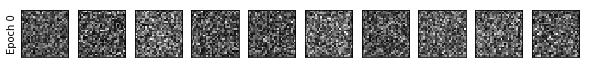

Epoch 1 loss 0.036900666


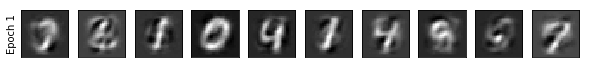

Epoch 2 loss 0.033241276


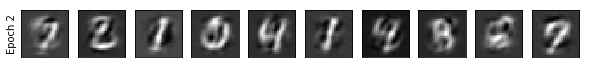

Epoch 3 loss 0.03091641


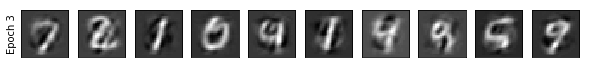

Epoch 4 loss 0.029019646


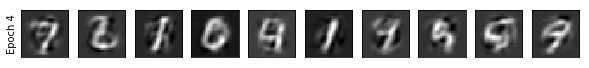

Epoch 5 loss 0.027224401


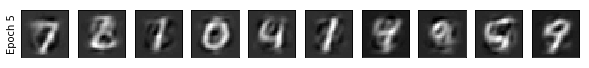

Epoch 6 loss 0.025536729


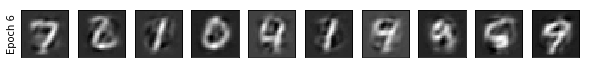

Epoch 7 loss 0.023599561


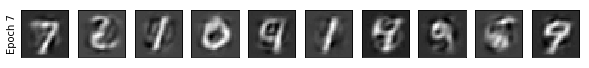

Epoch 8 loss 0.021719199


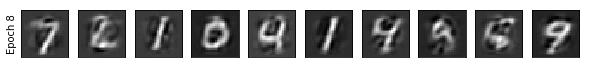

Epoch 9 loss 0.01988767


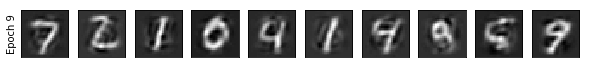

Epoch 10 loss 0.017986072


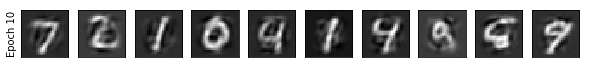

Epoch 11 loss 0.016094582


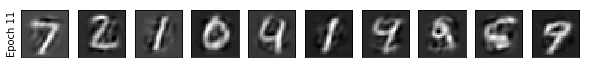

Epoch 12 loss 0.01426263


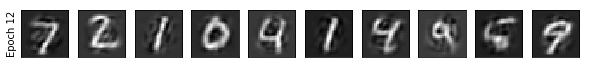

Epoch 13 loss 0.012464652


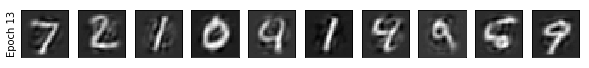

Epoch 14 loss 0.0108557725


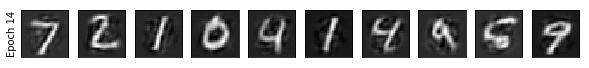

Epoch 15 loss 0.009433653


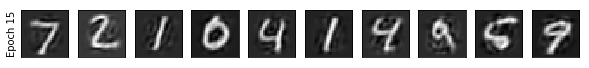

Epoch 16 loss 0.008172838


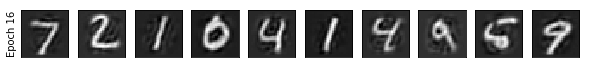

Epoch 17 loss 0.007239196


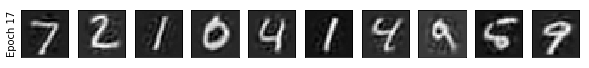

Epoch 18 loss 0.0065643135


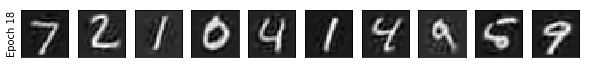

Epoch 19 loss 0.01102481


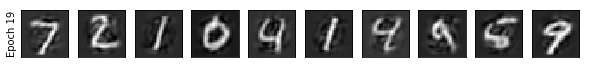

In [4]:
mnist = input_data.read_data_sets('MNIST_data/')

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(20):
    feed = {xs: mnist.test.images}
    loss,output = sess.run([_loss,_output], feed)
    print('Epoch', epoch, 'loss', loss)
    plot_online(epoch,output[0:10].reshape([-1,28,28]))
    
    for _ in range(600):
      feed = {xs: mnist.train.next_batch(100)[0]}
      sess.run(_optimize, feed)